In [1]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [53]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [46]:
data = pd.read_csv('/gdrive/MyDrive/ai/bitcoin.csv')
data.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2015.12.19,461.2,463.2,466.0,452.3,61.31K,-0.43%
1,2015.12.20,441.8,461.2,462.8,431.1,121.53K,-4.21%
2,2015.12.21,437.6,441.8,445.5,424.0,121.99K,-0.95%
3,2015.12.22,437.0,437.6,443.2,433.3,65.79K,-0.13%
4,2015.12.23,442.4,437.0,444.8,434.3,63.25K,1.24%


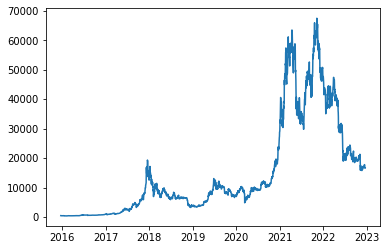

In [48]:
dtval = data[['종가']]
dtdate = pd.to_datetime(data.날짜)
plt.plot(dtdate, dtval)

In [49]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
sc_val= sc.fit_transform(dtval)
sc_val

array([[0.00138773],
       [0.00109887],
       [0.00103633],
       ...,
       [0.24432883],
       [0.2437928 ],
       [0.24373026]])

In [86]:
data_train = []
data_test = []

for i in range(0, 1800):
    data_train.append(sc_val[i])
for i in range(1800, len(sc_val)):
    data_test.append(sc_val[i])
data_train, data_test = np.array(data_train), np.array(data_test)

In [87]:
X_train = []
y_train = []
for i in range(10, 1800):
    X_train.append(sc_val[i-10:i])
    y_train.append(sc_val[i])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [88]:
# Initialising the RNN
regressor10 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor10.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor10.add(Dropout(0.3))
regressor10.add(LSTM(units = 50, return_sequences = True))
regressor10.add(Dropout(0.3))
regressor10.add(LSTM(units = 50, return_sequences = True))
regressor10.add(Dropout(0.3))
regressor10.add(LSTM(units = 50))
regressor10.add(Dropout(0.3))
regressor10.add(Dense(units = 1))
regressor10.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [89]:
regressor10.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
56/56 [==============================] - 8s 22ms/step - loss: 0.0018
Epoch 2/100
56/56 [==============================] - 1s 24ms/step - loss: 3.0089e-04
Epoch 3/100
56/56 [==============================] - 1s 23ms/step - loss: 2.9735e-04
Epoch 4/100
56/56 [==============================] - 1s 23ms/step - loss: 3.4769e-04
Epoch 5/100
56/56 [==============================] - 1s 23ms/step - loss: 2.8991e-04
Epoch 6/100
56/56 [==============================] - 1s 22ms/step - loss: 2.5501e-04
Epoch 7/100
56/56 [==============================] - 1s 23ms/step - loss: 2.5940e-04
Epoch 8/100
56/56 [==============================] - 2s 34ms/step - loss: 2.4677e-04
Epoch 9/100
56/56 [==============================] - 2s 36ms/step - loss: 2.3852e-04
Epoch 10/100
56/56 [==============================] - 1s 24ms/step - loss: 2.2473e-04
Epoch 11/100
56/56 [==============================] - 1s 24ms/step - loss: 2.3368e-04
Epoch 12/100
56/56 [==============================] - 1s 22ms/step 

24/24 [==============================] - 2s 6ms/step


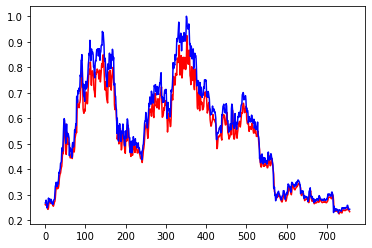

In [90]:
X_test10 = []
for i in range(1800, len(sc_val)):
    X_test10.append(sc_val[i-10:i])
X_test10 = np.array(X_test10)
X_test10 = np.reshape(X_test10, (X_test10.shape[0], X_test10.shape[1], 1))
final10 = regressor10.predict(X_test10)
plt.plot(final10, color = 'red')
plt.plot(data_test, color = 'blue')

In [91]:
X_train = []
y_train = []
for i in range(5, 1800):
    X_train.append(sc_val[i-5:i])
    y_train.append(sc_val[i])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [92]:
# Initialising the RNN
regressor5 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor5.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor5.add(Dropout(0.3))
regressor5.add(LSTM(units = 50, return_sequences = True))
regressor5.add(Dropout(0.3))
regressor5.add(LSTM(units = 50, return_sequences = True))
regressor5.add(Dropout(0.3))
regressor5.add(LSTM(units = 50))
regressor5.add(Dropout(0.3))
regressor5.add(Dense(units = 1))
regressor5.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [93]:
regressor5.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
57/57 [==============================] - 8s 15ms/step - loss: 0.0028
Epoch 2/100
57/57 [==============================] - 1s 14ms/step - loss: 3.1946e-04
Epoch 3/100
57/57 [==============================] - 1s 15ms/step - loss: 2.5861e-04
Epoch 4/100
57/57 [==============================] - 1s 14ms/step - loss: 2.4521e-04
Epoch 5/100
57/57 [==============================] - 1s 14ms/step - loss: 2.1487e-04
Epoch 6/100
57/57 [==============================] - 1s 14ms/step - loss: 2.2860e-04
Epoch 7/100
57/57 [==============================] - 1s 14ms/step - loss: 1.9863e-04
Epoch 8/100
57/57 [==============================] - 1s 14ms/step - loss: 2.5333e-04
Epoch 9/100
57/57 [==============================] - 1s 14ms/step - loss: 2.2966e-04
Epoch 10/100
57/57 [==============================] - 1s 14ms/step - loss: 2.2192e-04
Epoch 11/100
57/57 [==============================] - 1s 14ms/step - loss: 1.9263e-04
Epoch 12/100
57/57 [==============================] - 1s 14ms/step 

24/24 [==============================] - 2s 4ms/step


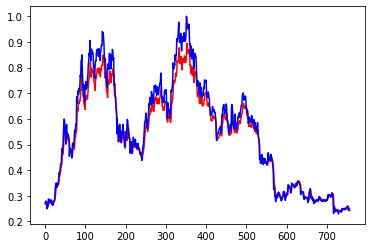

In [99]:
X_test5 = []
for i in range(1800, len(sc_val)):
    X_test5.append(sc_val[i-5:i])
X_test5 = np.array(X_test5)
X_test5 = np.reshape(X_test5, (X_test5.shape[0], X_test5.shape[1], 1))
final5 = regressor5.predict(X_test5)
plt.plot(final5, color = 'red')
plt.plot(data_test, color = 'blue')

In [101]:
X_train = []
y_train = []
for i in range(15, 1800):
    X_train.append(sc_val[i-15:i])
    y_train.append(sc_val[i])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [102]:
# Initialising the RNN
regressor15 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor15.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor15.add(Dropout(0.3))
regressor15.add(LSTM(units = 50, return_sequences = True))
regressor15.add(Dropout(0.3))
regressor15.add(LSTM(units = 50, return_sequences = True))
regressor15.add(Dropout(0.3))
regressor15.add(LSTM(units = 50))
regressor15.add(Dropout(0.3))
regressor15.add(Dense(units = 1))
regressor15.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [103]:
regressor15.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
56/56 [==============================] - 25s 32ms/step - loss: 0.0014
Epoch 2/100
56/56 [==============================] - 2s 33ms/step - loss: 4.1481e-04
Epoch 3/100
56/56 [==============================] - 2s 32ms/step - loss: 3.8501e-04
Epoch 4/100
56/56 [==============================] - 2s 32ms/step - loss: 3.5313e-04
Epoch 5/100
56/56 [==============================] - 2s 33ms/step - loss: 2.9525e-04
Epoch 6/100
56/56 [==============================] - 2s 32ms/step - loss: 2.8920e-04
Epoch 7/100
56/56 [==============================] - 2s 31ms/step - loss: 2.9779e-04
Epoch 8/100
56/56 [==============================] - 2s 33ms/step - loss: 2.9727e-04
Epoch 9/100
56/56 [==============================] - 3s 47ms/step - loss: 2.8691e-04
Epoch 10/100
56/56 [==============================] - 4s 66ms/step - loss: 2.4799e-04
Epoch 11/100
56/56 [==============================] - 3s 60ms/step - loss: 2.2249e-04
Epoch 12/100
56/56 [==============================] - 3s 57ms/step

24/24 [==============================] - 2s 9ms/step


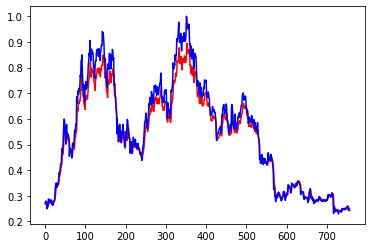

In [104]:
X_test15 = []
for i in range(1800, len(sc_val)):
    X_test15.append(sc_val[i-15:i])
X_test15 = np.array(X_test15)
X_test15 = np.reshape(X_test15, (X_test15.shape[0], X_test15.shape[1], 1))
final15 = regressor15.predict(X_test15)
plt.plot(final5, color = 'red')
plt.plot(data_test, color = 'blue')

In [105]:
regressor5.evaluate(X_test5, data_test)
regressor10.evaluate(X_test10, data_test)
regressor15.evaluate(X_test15, data_test)

24/24 [==============================] - 2s 9ms/step - loss: 0.0017


0.001669292221777141